## Assignment 1
Author: Vinícius Mello <viniciusdsmello@poli.ufrj.br>

Classification Task of Kuzushiji-MNIST dataset with Weightless Neural Networks

## Imports

In [5]:
import wisardpkg as wp
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
def load(f):
    return np.load(f)['arr_0']

DATASET_PATH: str = '/home/vsmello/Workspace/Personal/Projects/weightless-neural-network/data/kmnist/'

imgs = {
    'x_train': load(os.path.join(DATASET_PATH, 'kmnist-train-imgs.npz')),
    'x_test': load(os.path.join(DATASET_PATH, 'kmnist-test-imgs.npz'))
}

labels = {
    'y_train': [str(i) for i in load(os.path.join(DATASET_PATH, 'kmnist-train-labels.npz'))],
    'y_test': [str(i) for i in load(os.path.join(DATASET_PATH, 'kmnist-test-labels.npz'))]
}


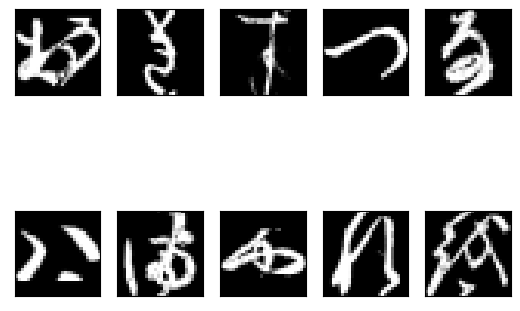

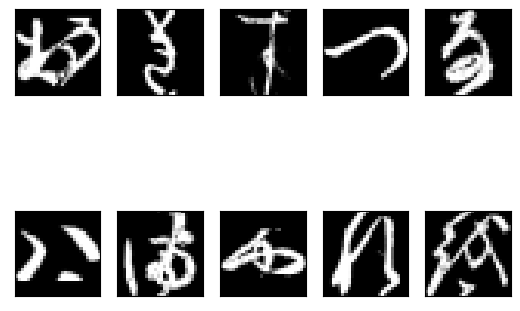

In [10]:
def sample_digit(target, X=imgs['x_train'], y=labels['y_train']):
    return next((digit for (digit, label) in zip(X, y) if label == str(target))).reshape((28, 28))


def display_mnist_digits():
    fig, axs = plt.subplots(2, 5)

    for i in range(2):
        for j in range(5):
            axs[i, j].imshow(sample_digit(5*i + j), cmap="gray")
            axs[i, j].axes.xaxis.set_visible(False)
            axs[i, j].axes.yaxis.set_visible(False)

    return fig


display_mnist_digits()


In [11]:
class BinarizeKmnist():
  def basic_bin(self, obj):
    bin = dict()
    for key, value in obj.items():
      bin[key] = [np.where(xis<128, 0, 1).flatten() for xis in value]
    return bin

  def circle_thermometer(self):
    pass

In [12]:
binarize = BinarizeKmnist()
imgs_bin = binarize.basic_bin(imgs)

In [13]:
model_info_kmnist = wp.Wisard(20)
model_info_kmnist.train(imgs_bin['x_train'], labels['y_train'])
y_pred = model_info_kmnist.classify(imgs_bin['x_test'])
accuracy_score(labels['y_test'], y_pred)

0.7261

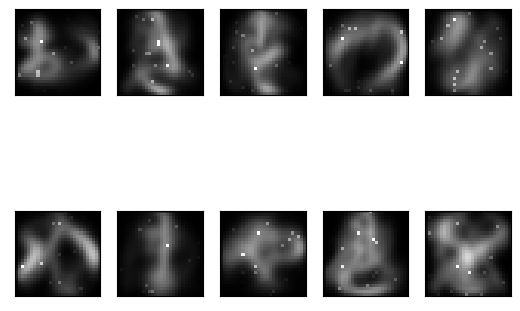

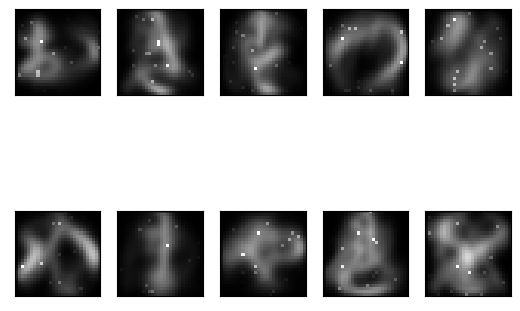

In [14]:
def display_digits(images):
  fig, axs = plt.subplots(2, 5, squeeze=True)

  for i, img in enumerate(images.values()):
    img = np.reshape(img, (28, 28))
    img = img/np.max(img)
    fig.axes[i].imshow(img, cmap="gray", vmin=0., vmax=1.)
    fig.axes[i].xaxis.set_visible(False)
    fig.axes[i].yaxis.set_visible(False)

  return fig
  
display_digits(model_info_kmnist.getMentalImages())